In [1]:
from quantile_regression_chain import quantileRegression_chain as qRC
from quantile_regression_chain import quantileRegression_chain_disc as qRCd
import numpy as np
import yaml

Welcome to JupyROOT 6.22/02


In [2]:
%load_ext snakeviz

In [3]:
stream = open('config.yaml','r')
inp=yaml.safe_load(stream)
dataframes = inp['dataframes']

ss = ['probeCovarianceIeIp','probeS4','probeR9','probePhiWidth','probeSigmaIeIe','probeEtaWidth']
ch = ['probeChIso03','probeChIso03worst']
ph = ['probePhoIso']
year = '2018'
n_evts = 1000
workDir = '/work/gallim/dataframes/2018'
#weightsDirs = '/work/gallim/weights/2018_mc_full_dask'
weightsDirs = '/work/gallim/tmp/tnp_fulldask/weights'

In [4]:
cols = ["mass","probeScEnergy","probeScEta","probePhi","run","weight",
        "weight_clf","rho","probeR9","probeSigmaIeIe","probePhiWidth",
        "probeEtaWidth","probeCovarianceIeIp","probeCovarianceIpIp",
        "probeS4","probePhoIso","probeChIso03","probeChIso03worst",
        "probeSigmaRR","probePt","tagPt","probePassEleVeto","tagScEta"]

### Shower Shapes

In [5]:
qrc_EB = qRC(year, 'EB', workDir, ss)
qrc_EB.loadMCDF(dataframes['mc']['EB']['input'],0,n_evts,columns=cols)
qrc_EB.loadDataDF(dataframes['data']['EB']['input'],0,n_evts,columns=cols)

In [6]:
qrc_EE = qRC(year, 'EE', workDir, ss)
qrc_EE.loadMCDF(dataframes['mc']['EE']['input'],0,n_evts,columns=cols)
qrc_EE.loadDataDF(dataframes['data']['EE']['input'],0,n_evts,columns=cols)

In [7]:
for qrc in [qrc_EB, qrc_EE]:
    for var in qrc.vars:
        qrc.loadClfs(var,weightsDir=weightsDirs)
        qrc.correctY(var)

### Photon Iso

In [8]:
qrc_ph_EB = qRCd(year, 'EB', workDir, ph)

qrc_ph_EB.MC = qrc_EB.MC
qrc_ph_EB.data = qrc_EB.data

qrc_ph_EB.loadp0tclf('probePhoIso', weightsDir=weightsDirs)
qrc_ph_EB.loadClfs('probePhoIso',weightsDir=weightsDirs)
qrc_ph_EB.correctY('probePhoIso')

In [9]:
qrc_ph_EE = qRCd(year, 'EE', workDir, ph)

qrc_ph_EE.MC = qrc_EE.MC
qrc_ph_EE.data = qrc_EE.data

qrc_ph_EE.loadp0tclf('probePhoIso', weightsDir=weightsDirs)
qrc_ph_EE.loadClfs('probePhoIso',weightsDir=weightsDirs)
qrc_ph_EE.correctY('probePhoIso')

### Charged Iso

In [12]:
qrc_ch_EB = qRCd(year, 'EB', workDir, ch)

qrc_ch_EB.MC = qrc_ph_EB.MC
qrc_ch_EB.data = qrc_ph_EB.data

qrc_ch_EB.load3Catclf(ch, weightsDir=weightsDirs)
qrc_ch_EB.loadTailRegressors(ch,weightsDirs)
for var in qrc_ch_EB.vars:
    qrc_ch_EB.loadClfs(var,weightsDirs)
    qrc_ch_EB.correctY(var)

In [13]:
qrc_ch_EE = qRCd(year, 'EE', workDir, ch)

qrc_ch_EE.MC = qrc_ph_EE.MC
qrc_ch_EE.data = qrc_ph_EE.data

qrc_ch_EE.load3Catclf(ch, weightsDir=weightsDirs)
qrc_ch_EE.loadTailRegressors(ch,weightsDirs)
for var in qrc_ch_EE.vars:
    qrc_ch_EE.loadClfs(var,weightsDirs)
    qrc_ch_EE.correctY(var)

In [14]:
# Produce output files

output_name_EB = 'final_output_EB'
output_name_EE = 'final_output_EE'

#qrc_ch_EB.MC.to_hdf('{}/{}.h5'.format(workDir, output_name_EB),'df',mode='w',format='t')
#qrc_ch_EE.MC.to_hdf('{}/{}.h5'.format(workDir, output_name_EE),'df',mode='w',format='t')
qrc_ch_EB.MC.to_hdf('{}/{}.h5'.format(weightsDirs, output_name_EB),'df',mode='w',format='t')
qrc_ch_EE.MC.to_hdf('{}/{}.h5'.format(weightsDirs, output_name_EE),'df',mode='w',format='t')

## Plots

In [18]:
import matplotlib.pyplot as plt
import mplhep
import pandas as pd

In [16]:
plt.style.use(mplhep.style.CMS)

In [19]:
df_EB = pd.read_hdf('{}/{}.h5'.format(weightsDirs, output_name_EB))
df_EE = pd.read_hdf('{}/{}.h5'.format(weightsDirs, output_name_EE))

# CovarianceIeIp

In [44]:
col = 'darkorange'
col_corr = 'darkviolet'

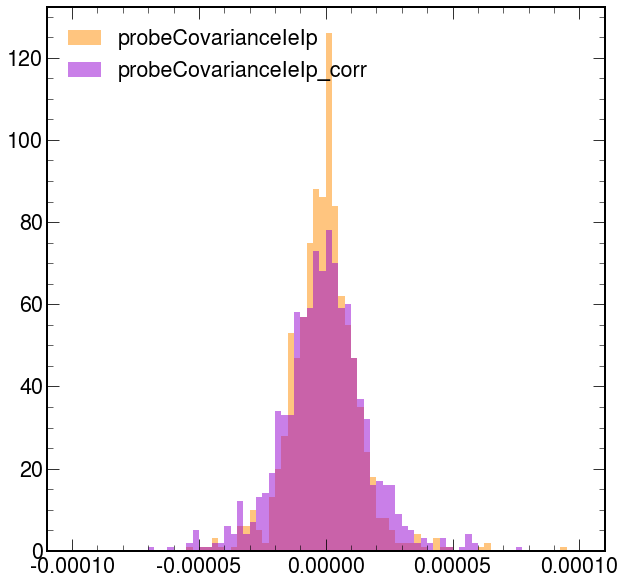

In [45]:
rg = [-0.0001, 0.0001]
bins = 80


plt.hist(df_EB['probeCovarianceIeIp'], bins=bins, range=rg, alpha=0.5, color=col, label='probeCovarianceIeIp')
plt.hist(df_EB['probeCovarianceIeIp_corr'], bins=bins, range=rg, alpha=0.5, color=col_corr, label='probeCovarianceIeIp_corr')
plt.legend(loc='upper left')
plt.show()

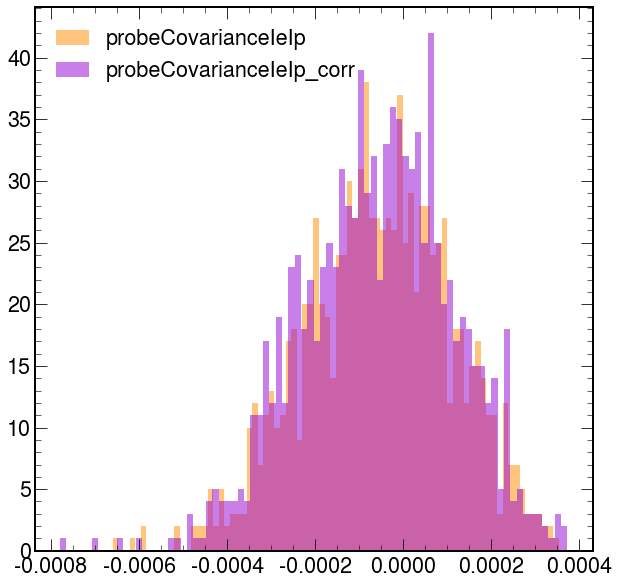

In [46]:
bins = 80

plt.hist(df_EE['probeCovarianceIeIp'], bins=bins, alpha=0.5, color=col, label='probeCovarianceIeIp')
plt.hist(df_EE['probeCovarianceIeIp_corr'], bins=bins, alpha=0.5, color=col_corr, label='probeCovarianceIeIp_corr')
plt.legend(loc='upper left')
plt.show()

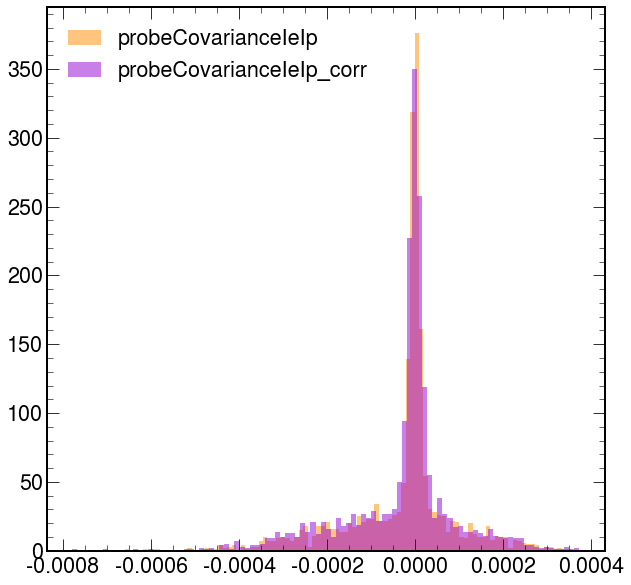

In [51]:
bins = 100

plt.hist(pd.concat([df_EB['probeCovarianceIeIp'], df_EE['probeCovarianceIeIp']], ignore_index=True), 
         bins=bins, alpha=0.5, color=col, label='probeCovarianceIeIp')
plt.hist(pd.concat([df_EB['probeCovarianceIeIp_corr'], df_EE['probeCovarianceIeIp_corr']], ignore_index=True), 
         bins=bins, alpha=0.5, color=col_corr, label='probeCovarianceIeIp_corr')
plt.legend(loc='upper left')
plt.show()

# S4

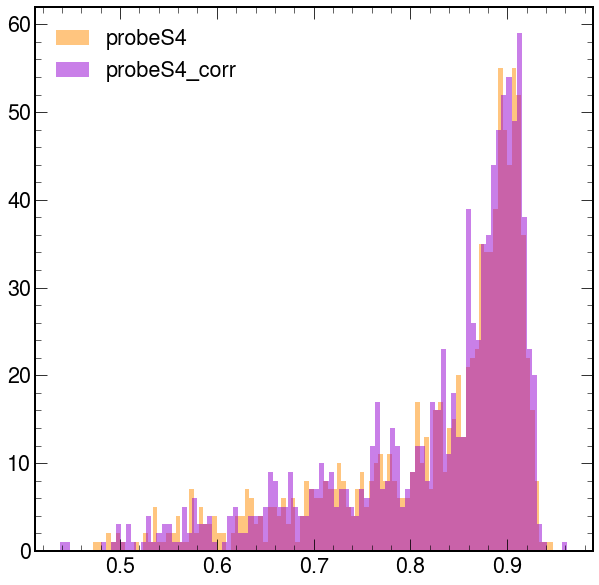

In [48]:
bins = 100

plt.hist(df_EB['probeS4'], bins=bins, alpha=0.5, color=col, label='probeS4')
plt.hist(df_EB['probeS4_corr'], bins=bins, alpha=0.5, color=col_corr, label='probeS4_corr')
plt.legend(loc='upper left')
plt.show()

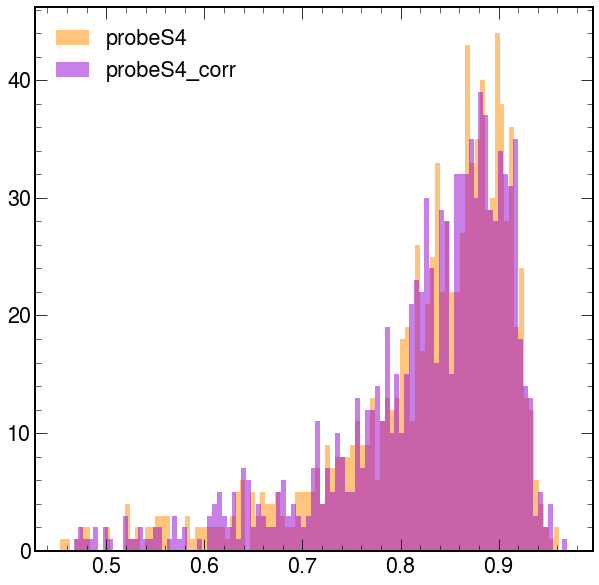

In [49]:
bins = 100

plt.hist(df_EE['probeS4'], bins=bins, alpha=0.5, color=col, label='probeS4')
plt.hist(df_EE['probeS4_corr'], bins=bins, alpha=0.5, color=col_corr, label='probeS4_corr')
plt.legend(loc='upper left')
plt.show()

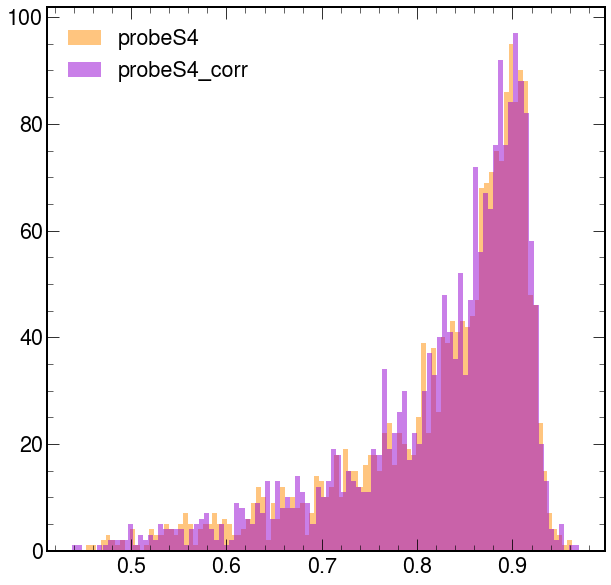

In [52]:
bins = 100

plt.hist(pd.concat([df_EB['probeS4'], df_EE['probeS4']], ignore_index=True), 
         bins=bins, alpha=0.5, color=col, label='probeS4')
plt.hist(pd.concat([df_EB['probeS4_corr'], df_EE['probeS4_corr']], ignore_index=True), 
         bins=bins, alpha=0.5, color=col_corr, label='probeS4_corr')
plt.legend(loc='upper left')
plt.show()

# R9

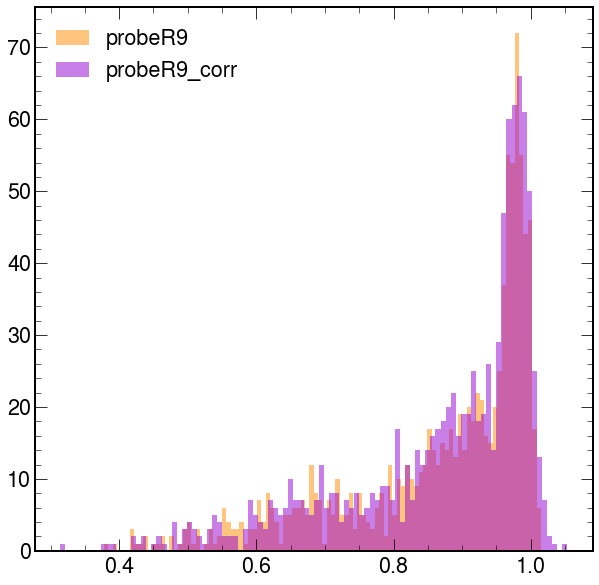

In [53]:
bins = 100

plt.hist(df_EB['probeR9'], bins=bins, alpha=0.5, color=col, label='probeR9')
plt.hist(df_EB['probeR9_corr'], bins=bins, alpha=0.5, color=col_corr, label='probeR9_corr')
plt.legend(loc='upper left')
plt.show()

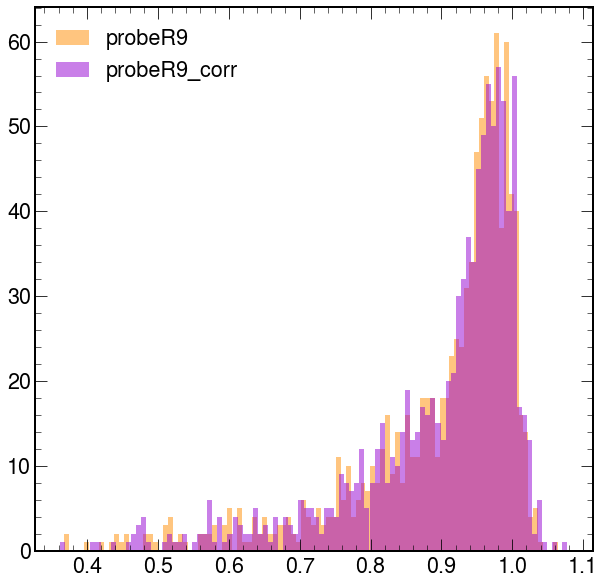

In [54]:
bins = 100

plt.hist(df_EE['probeR9'], bins=bins, alpha=0.5, color=col, label='probeR9')
plt.hist(df_EE['probeR9_corr'], bins=bins, alpha=0.5, color=col_corr, label='probeR9_corr')
plt.legend(loc='upper left')
plt.show()

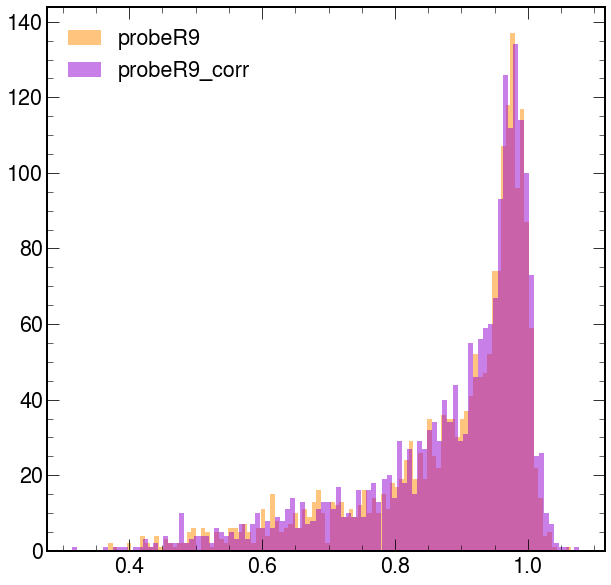

In [55]:
bins = 100

plt.hist(pd.concat([df_EB['probeR9'], df_EE['probeR9']], ignore_index=True), 
         bins=bins, alpha=0.5, color=col, label='probeR9')
plt.hist(pd.concat([df_EB['probeR9_corr'], df_EE['probeR9_corr']], ignore_index=True), 
         bins=bins, alpha=0.5, color=col_corr, label='probeR9_corr')
plt.legend(loc='upper left')
plt.show()

# PhiWidth

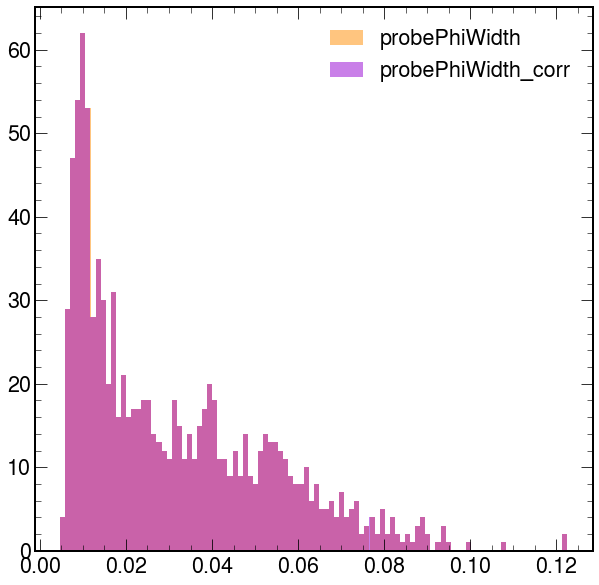

In [59]:
bins = 100

plt.hist(df_EB['probePhiWidth'], bins=bins, alpha=0.5, color=col, label='probePhiWidth')
plt.hist(df_EB['probePhiWidth_corr'], bins=bins, alpha=0.5, color=col_corr, label='probePhiWidth_corr')
plt.legend(loc='upper right')
plt.show()

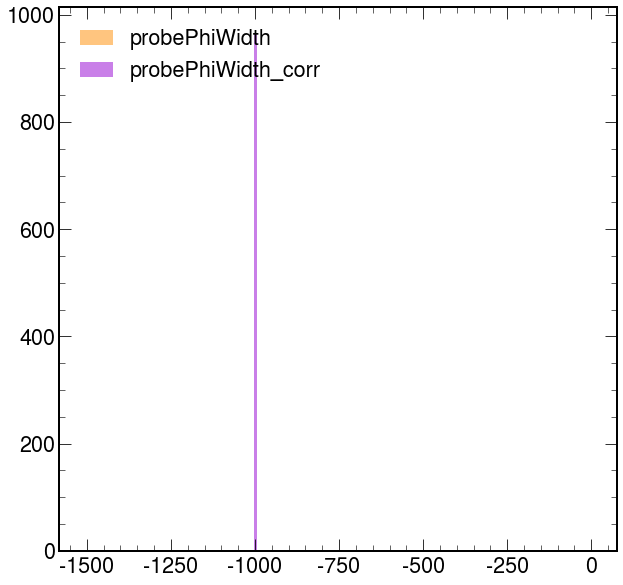

In [60]:
bins = 100

plt.hist(df_EE['probePhiWidth'], bins=bins, alpha=0.5, color=col, label='probePhiWidth')
plt.hist(df_EE['probePhiWidth_corr'], bins=bins, alpha=0.5, color=col_corr, label='probePhiWidth_corr')
plt.legend(loc='upper left')
plt.show()

In [ ]:
bins = 100

plt.hist(pd.concat([df_EB['probeR9'], df_EE['probeR9']], ignore_index=True), 
         bins=bins, alpha=0.5, color=col, label='probeR9')
plt.hist(pd.concat([df_EB['probeR9_corr'], df_EE['probeR9_corr']], ignore_index=True), 
         bins=bins, alpha=0.5, color=col_corr, label='probeR9_corr')
plt.legend(loc='upper left')
plt.show()

# SigmaIeIe

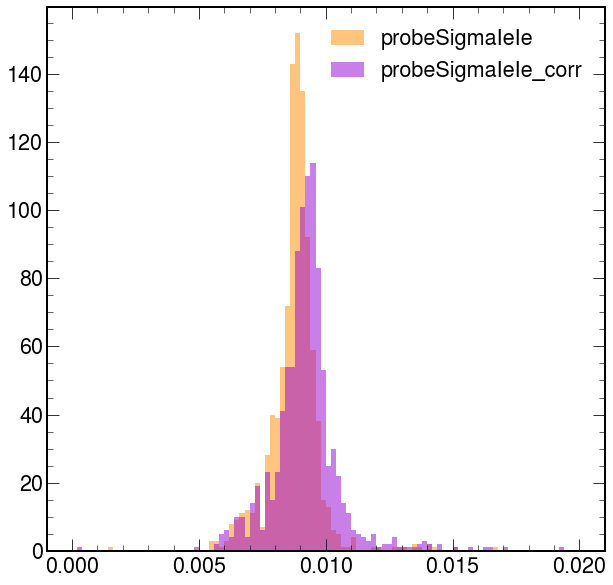

In [63]:
bins = 100
rg = [0., 0.02]

plt.hist(df_EB['probeSigmaIeIe'], bins=bins, range=rg, alpha=0.5, color=col, label='probeSigmaIeIe')
plt.hist(df_EB['probeSigmaIeIe_corr'], bins=bins, range=rg, alpha=0.5, color=col_corr, label='probeSigmaIeIe_corr')
plt.legend(loc='upper right')
plt.show()

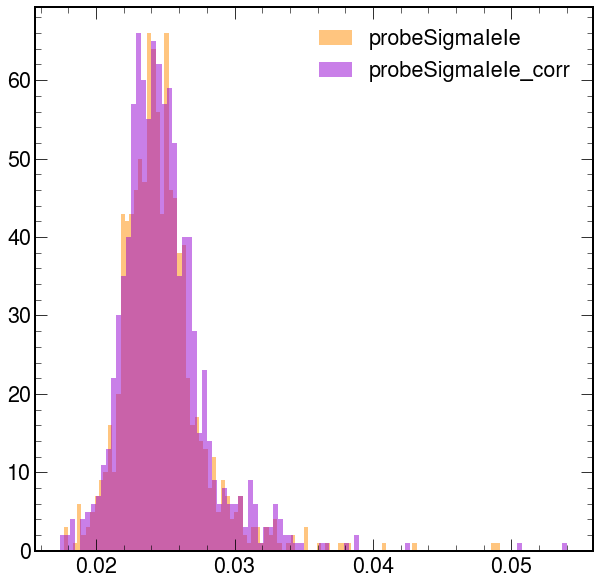

In [65]:
bins = 100

plt.hist(df_EE['probeSigmaIeIe'], bins=bins, alpha=0.5, color=col, label='probeSigmaIeIe')
plt.hist(df_EE['probeSigmaIeIe_corr'], bins=bins, alpha=0.5, color=col_corr, label='probeSigmaIeIe_corr')
plt.legend(loc='upper right')
plt.show()

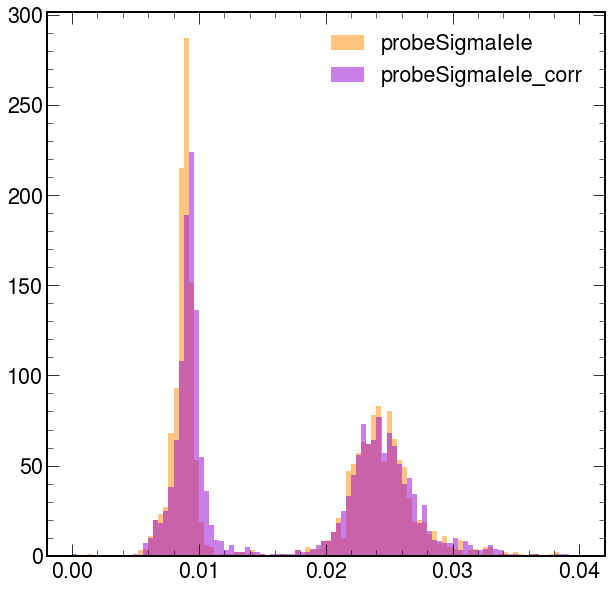

In [68]:
bins = 100
rg = [0., 0.04]

plt.hist(pd.concat([df_EB['probeSigmaIeIe'], df_EE['probeSigmaIeIe']], ignore_index=True), 
         bins=bins, range=rg, alpha=0.5, color=col, label='probeSigmaIeIe')
plt.hist(pd.concat([df_EB['probeSigmaIeIe_corr'], df_EE['probeSigmaIeIe_corr']], ignore_index=True), 
         bins=bins, range=rg, alpha=0.5, color=col_corr, label='probeSigmaIeIe_corr')
plt.legend(loc='upper right')
plt.show()

# EtaWidth

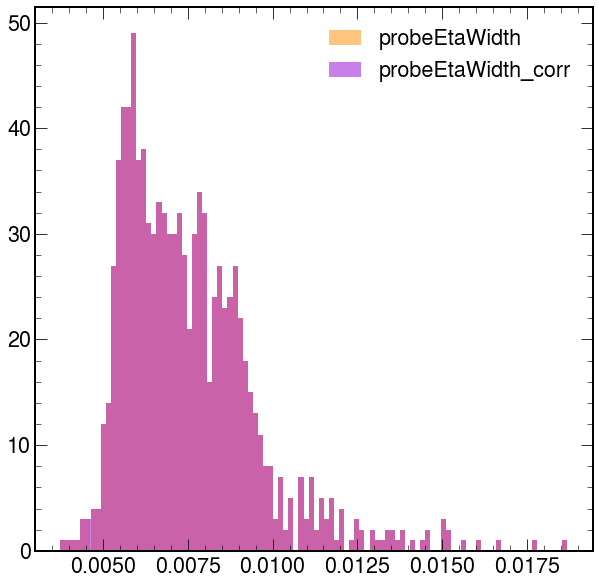

In [72]:
bins = 100

plt.hist(df_EB['probeEtaWidth'], bins=bins, alpha=0.5, color=col, label='probeEtaWidth')
plt.hist(df_EB['probeEtaWidth_corr'], bins=bins, alpha=0.5, color=col_corr, label='probeEtaWidth_corr')
plt.legend(loc='upper right')
plt.show()

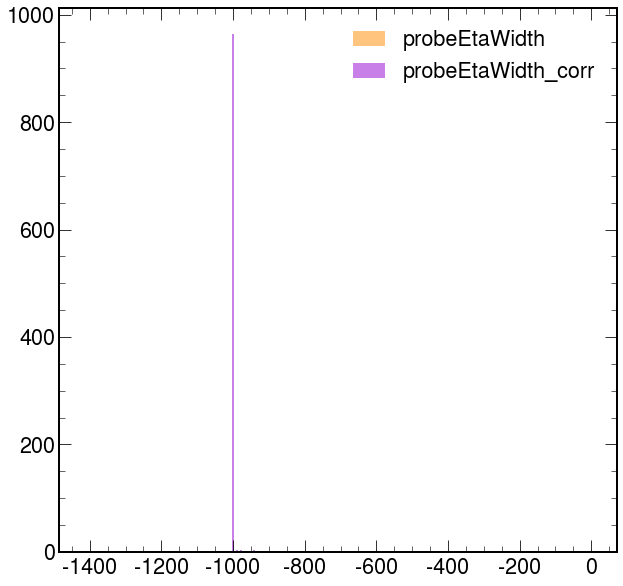

In [73]:
bins = 100

plt.hist(df_EE['probeEtaWidth'], bins=bins, alpha=0.5, color=col, label='probeEtaWidth')
plt.hist(df_EE['probeEtaWidth_corr'], bins=bins, alpha=0.5, color=col_corr, label='probeEtaWidth_corr')
plt.legend(loc='upper right')
plt.show()

In [ ]:
bins = 100

plt.hist(pd.concat([df_EB['probeEtaWidth'], df_EE['probeEtaWidth']], ignore_index=True), 
         bins=bins, alpha=0.5, color=col, label='probeEtaWidth')
plt.hist(pd.concat([df_EB['probeEtaWidth_corr'], df_EE['probeEtaWidth_corr']], ignore_index=True), 
         bins=bins, alpha=0.5, color=col_corr, label='probeEtaWidth_corr')
plt.legend(loc='upper left')
plt.show()

# ChIso03

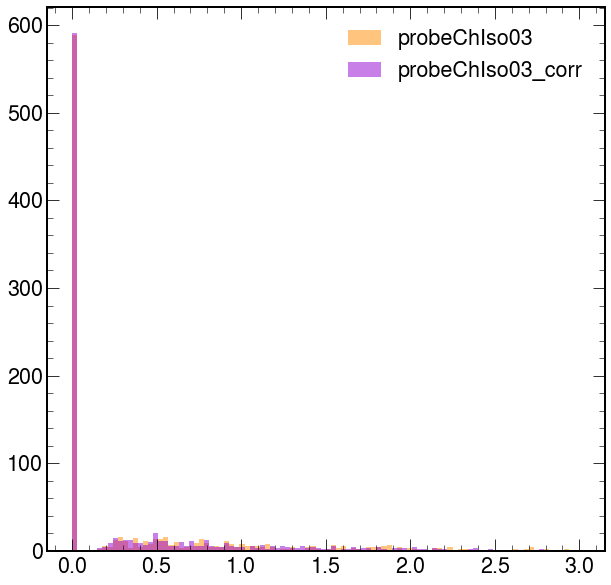

In [75]:
bins = 100
rg = [0., 3.]

plt.hist(df_EB['probeChIso03'], bins=bins, range=rg, alpha=0.5, color=col, label='probeChIso03')
plt.hist(df_EB['probeChIso03_corr'], bins=bins, range=rg, alpha=0.5, color=col_corr, label='probeChIso03_corr')
plt.legend(loc='upper right')
plt.show()

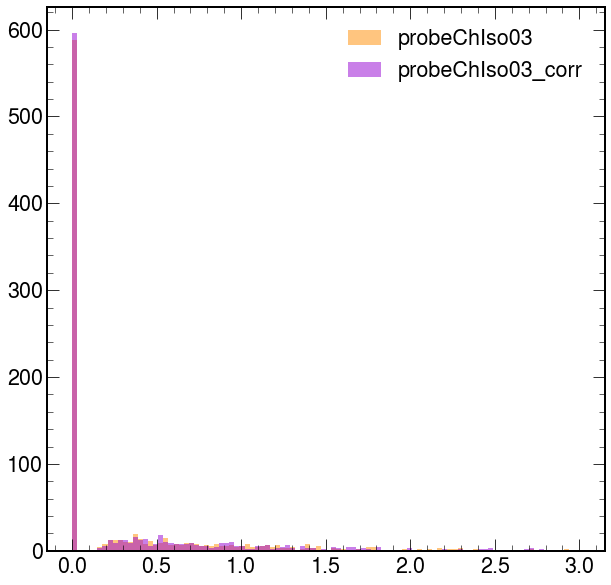

In [77]:
bins = 100
rg = [0., 3.]

plt.hist(df_EE['probeChIso03'], bins=bins, range=rg, alpha=0.5, color=col, label='probeChIso03')
plt.hist(df_EE['probeChIso03_corr'], bins=bins, range=rg, alpha=0.5, color=col_corr, label='probeChIso03_corr')
plt.legend(loc='upper right')
plt.show()

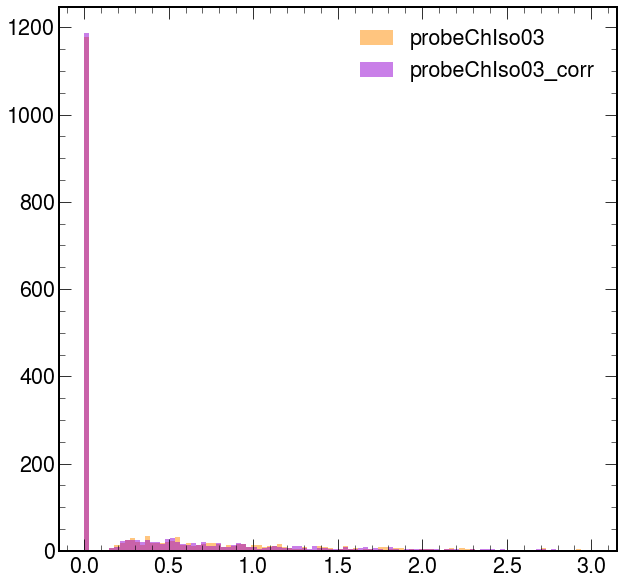

In [80]:
bins = 100
rg = [0., 3.]

plt.hist(pd.concat([df_EB['probeChIso03'], df_EE['probeChIso03']], ignore_index=True), 
         bins=bins, range=rg, alpha=0.5, color=col, label='probeChIso03')
plt.hist(pd.concat([df_EB['probeChIso03_corr'], df_EE['probeChIso03_corr']], ignore_index=True), 
         bins=bins, range=rg, alpha=0.5, color=col_corr, label='probeChIso03_corr')
plt.legend(loc='upper right')
plt.show()

# ChIso03worst

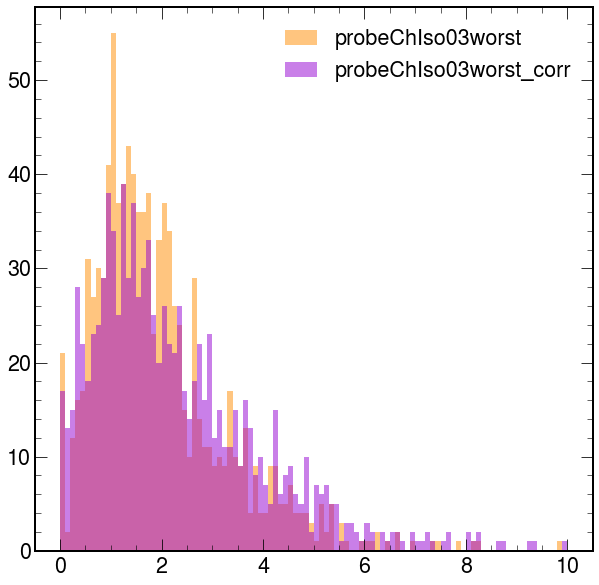

In [83]:
bins = 100
rg = [0, 10]

plt.hist(df_EB['probeChIso03worst'], bins=bins, range=rg, alpha=0.5, color=col, label='probeChIso03worst')
plt.hist(df_EB['probeChIso03worst_corr'], bins=bins, range=rg, alpha=0.5, color=col_corr, label='probeChIso03worst_corr')
plt.legend(loc='upper right')
plt.show()

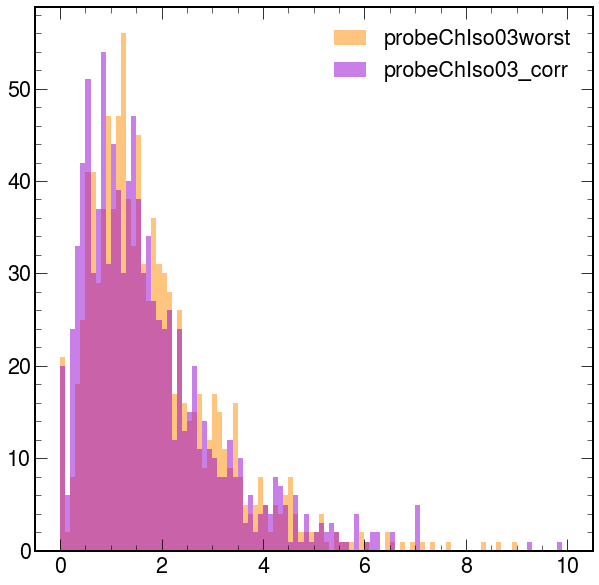

In [85]:
bins = 100
rg = [0., 10]

plt.hist(df_EE['probeChIso03worst'], bins=bins, range=rg, alpha=0.5, color=col, label='probeChIso03worst')
plt.hist(df_EE['probeChIso03worst_corr'], bins=bins, range=rg, alpha=0.5, color=col_corr, label='probeChIso03_corr')
plt.legend(loc='upper right')
plt.show()

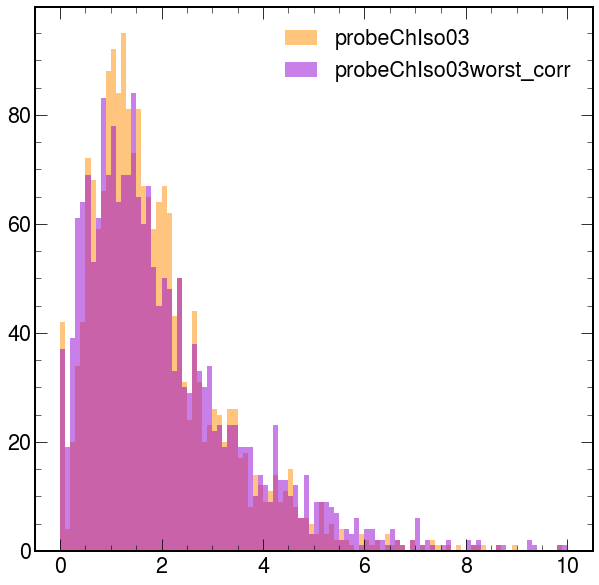

In [86]:
bins = 100
rg = [0., 10]

plt.hist(pd.concat([df_EB['probeChIso03worst'], df_EE['probeChIso03worst']], ignore_index=True), 
         bins=bins, range=rg, alpha=0.5, color=col, label='probeChIso03')
plt.hist(pd.concat([df_EB['probeChIso03worst_corr'], df_EE['probeChIso03worst_corr']], ignore_index=True), 
         bins=bins, range=rg, alpha=0.5, color=col_corr, label='probeChIso03worst_corr')
plt.legend(loc='upper right')
plt.show()

# PhoIso

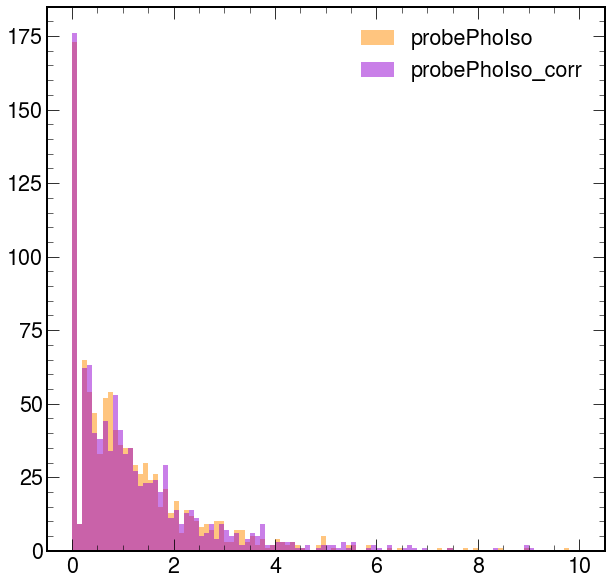

In [88]:
bins = 100
rg = [0, 10]

plt.hist(df_EB['probePhoIso'], bins=bins, range=rg, alpha=0.5, color=col, label='probePhoIso')
plt.hist(df_EB['probePhoIso_corr'], bins=bins, range=rg, alpha=0.5, color=col_corr, label='probePhoIso_corr')
plt.legend(loc='upper right')
plt.show()

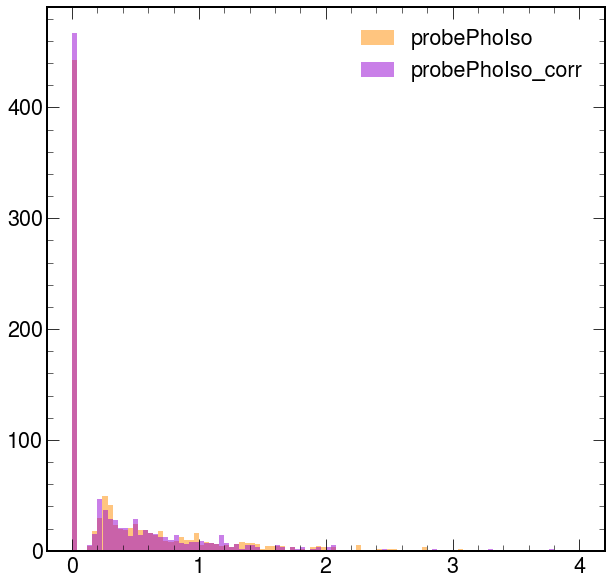

In [90]:
bins = 100
rg = [0, 4]

plt.hist(df_EE['probePhoIso'], bins=bins, range=rg, alpha=0.5, color=col, label='probePhoIso')
plt.hist(df_EE['probePhoIso_corr'], bins=bins, range=rg, alpha=0.5, color=col_corr, label='probePhoIso_corr')
plt.legend(loc='upper right')
plt.show()

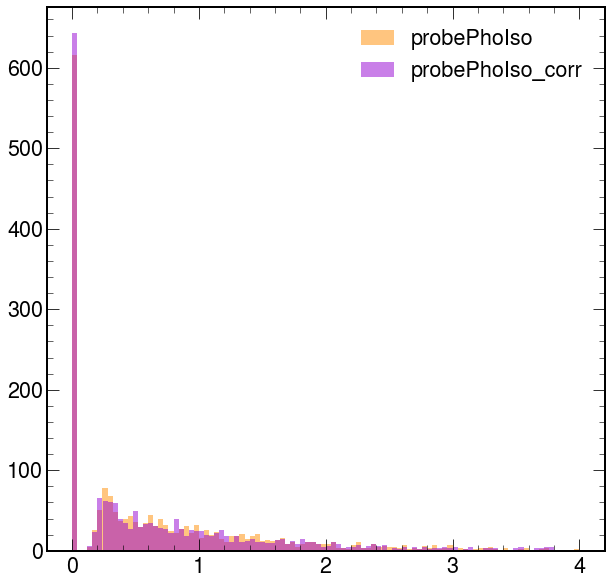

In [92]:
bins = 100
rg = [0, 4]

plt.hist(pd.concat([df_EB['probePhoIso'], df_EE['probePhoIso']], ignore_index=True), 
         bins=bins, range=rg, alpha=0.5, color=col, label='probePhoIso')
plt.hist(pd.concat([df_EB['probePhoIso_corr'], df_EE['probePhoIso_corr']], ignore_index=True), 
         bins=bins, range=rg, alpha=0.5, color=col_corr, label='probePhoIso_corr')
plt.legend(loc='upper right')
plt.show()